In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlflow
import mlflow.sklearn

# Read the training data
import os
train_file_path = os.getcwd() + '/house-prices-advanced-regression-techniques/train.csv'
test_file_path = os.getcwd() + '/house-prices-advanced-regression-techniques/test.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


In [2]:
#mlflow.end_run()

In [3]:
#mlflow.start_run()

In [2]:
# Print shape of the data
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


Traing data has 81 columns which is one more than the column number of test data. Extra column is target variable, 'SalePrice'

In [3]:
y = train_data.SalePrice

Make data preprocessings.

Check for missing values

In [4]:
train_data_features_with_null = []
for feature in train_data:
    if train_data[feature].isna().sum() > 0:
        train_data_features_with_null.append(feature)

test_data_features_with_null = []
for feature in test_data:
    if test_data[feature].isna().sum() > 0:
        test_data_features_with_null.append(feature)

print('# of features with null values in training data :', len(train_data_features_with_null))
print('Features with null values in training data :', *train_data_features_with_null,sep='\n')
print('\n\n')
print('# of features with null values in test data :', len(test_data_features_with_null))
print('Features with null values in test data :', *test_data_features_with_null,sep='\n')

# of features with null values in training data : 19
Features with null values in training data :
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature



# of features with null values in test data : 33
Features with null values in test data :
MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


Check for the features which have null values in either training or test data.

In [5]:
features_with_null = test_data_features_with_null.copy()
for feature in train_data_features_with_null:
    if feature not in test_data_features_with_null.copy():
        features_with_null.append(feature)

print('# of features containing null values :', len(features_with_null))

print('Features containing null values :', *features_with_null, sep = '\n')

# of features containing null values : 34
Features containing null values :
MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType
Electrical


Calculate percentages of missing values in training data.

In [6]:
nan_percent_train = {col : train_data[col].isnull().mean() for col in train_data.columns}
nan_percent_train = dict(sorted(nan_percent_train.items(), key = lambda x: x[1], reverse = True))
# Remove features with 0 percent nan values from this list.
new_nan_percent_train = {}
for (key, value) in nan_percent_train.items():
    if value > 0:
        new_nan_percent_train[key] = value
nan_percent_train = new_nan_percent_train.copy()

# Print these features
for key in nan_percent_train.keys():
    print(key,' \t\t: ',nan_percent_train[key])

PoolQC  		:  0.9952054794520548
MiscFeature  		:  0.963013698630137
Alley  		:  0.9376712328767123
Fence  		:  0.8075342465753425
FireplaceQu  		:  0.4726027397260274
LotFrontage  		:  0.1773972602739726
GarageType  		:  0.05547945205479452
GarageYrBlt  		:  0.05547945205479452
GarageFinish  		:  0.05547945205479452
GarageQual  		:  0.05547945205479452
GarageCond  		:  0.05547945205479452
BsmtExposure  		:  0.026027397260273973
BsmtFinType2  		:  0.026027397260273973
BsmtQual  		:  0.025342465753424658
BsmtCond  		:  0.025342465753424658
BsmtFinType1  		:  0.025342465753424658
MasVnrType  		:  0.005479452054794521
MasVnrArea  		:  0.005479452054794521
Electrical  		:  0.0006849315068493151


In [10]:
nan_percent_test = {col : test_data[col].isnull().mean() for col in test_data.columns}
nan_percent_test = dict(sorted(nan_percent_test.items(), key = lambda x: x[1], reverse = True))
# Remove features with 0 percent nan values from this list.
new_nan_percent_test = {}
for (key, value) in nan_percent_test.items():
    if value > 0:
        new_nan_percent_test[key] = value
nan_percent_test = new_nan_percent_train.copy()

# Print these features
for key in nan_percent_test.keys():
    print(key,' \t\t: ',nan_percent_test[key])

PoolQC  		:  0.9952054794520548
MiscFeature  		:  0.963013698630137
Alley  		:  0.9376712328767123
Fence  		:  0.8075342465753425
FireplaceQu  		:  0.4726027397260274
LotFrontage  		:  0.1773972602739726
GarageType  		:  0.05547945205479452
GarageYrBlt  		:  0.05547945205479452
GarageFinish  		:  0.05547945205479452
GarageQual  		:  0.05547945205479452
GarageCond  		:  0.05547945205479452
BsmtExposure  		:  0.026027397260273973
BsmtFinType2  		:  0.026027397260273973
BsmtQual  		:  0.025342465753424658
BsmtCond  		:  0.025342465753424658
BsmtFinType1  		:  0.025342465753424658
MasVnrType  		:  0.005479452054794521
MasVnrArea  		:  0.005479452054794521
Electrical  		:  0.0006849315068493151


Calculate percentage of missing values in test data.

Drop the features with percentage of nan values greater than 50.

In [12]:
high_nan_percent = {}
for (key, value) in nan_percent_train.items():
    if value > 0.5:
        high_nan_percent[key] = value
        
for (key, value) in nan_percent_test.items():
    if value > 0.5:
        high_nan_percent[key] = value

# Remove the keys from full lists
for key in high_nan_percent.keys():
    if key in nan_percent_train.keys():
        nan_percent_train.pop(key)
    if key in nan_percent_test.keys():
        nan_percent_test.pop(key)

In [8]:
mlflow.log_param("Parameters with high percentage of NaN values", high_nan_percent.keys())
mlflow.log_param("Percentages of NaN values", high_nan_percent.values())

2022/11/17 19:35:15 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



dict_values([0.9952054794520548, 0.963013698630137, 0.9376712328767123, 0.8075342465753425])

Drop the features with high percentage of NaN values

In [13]:
reduced_train_data = train_data.drop(list(nan_percent_train), axis = 'columns')
reduced_test_data = test_data.drop(list(nan_percent_test), axis = 'columns')

Impute training data and test data. Numeric features will be imputed by "mean" while categorical features will be imputed by "mode" value.

In [14]:
from sklearn.impute import SimpleImputer
my_numeric_imputer = SimpleImputer()
my_categorical_imputer = SimpleImputer(strategy = 'most_frequent')

# Before imputation, select training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(reduced_train_data, y, train_size=0.8,
                                                      test_size=0.2, random_state=0)
X_test = reduced_test_data.copy()

In [30]:
imputed_X_train = X_train.copy()
imputed_X_test = X_test.copy()
imputed_X_valid = X_valid.copy()

for label,_ in imputed_X_test.items():
    if imputed_X_train[label].dtype == 'object':
        imputed_X_train[label].fillna(imputed_X_train[label].mode()[0], inplace = True)
        imputed_X_test[label].fillna(imputed_X_train[label].mode()[0], inplace = True)
    else:
        imputed_X_train[label].fillna(imputed_X_train[label].mean(), inplace = True)
        imputed_X_test[label].fillna(imputed_X_train[label].mean(), inplace = True)

Apply ordinal encoder.

In [31]:
from sklearn.preprocessing import OrdinalEncoder
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

Now look at correlation matrix

In [32]:
label_X_train.SalePrice

618     314813
870     109500
92      163500
817     271000
302     205000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1168, dtype: int64

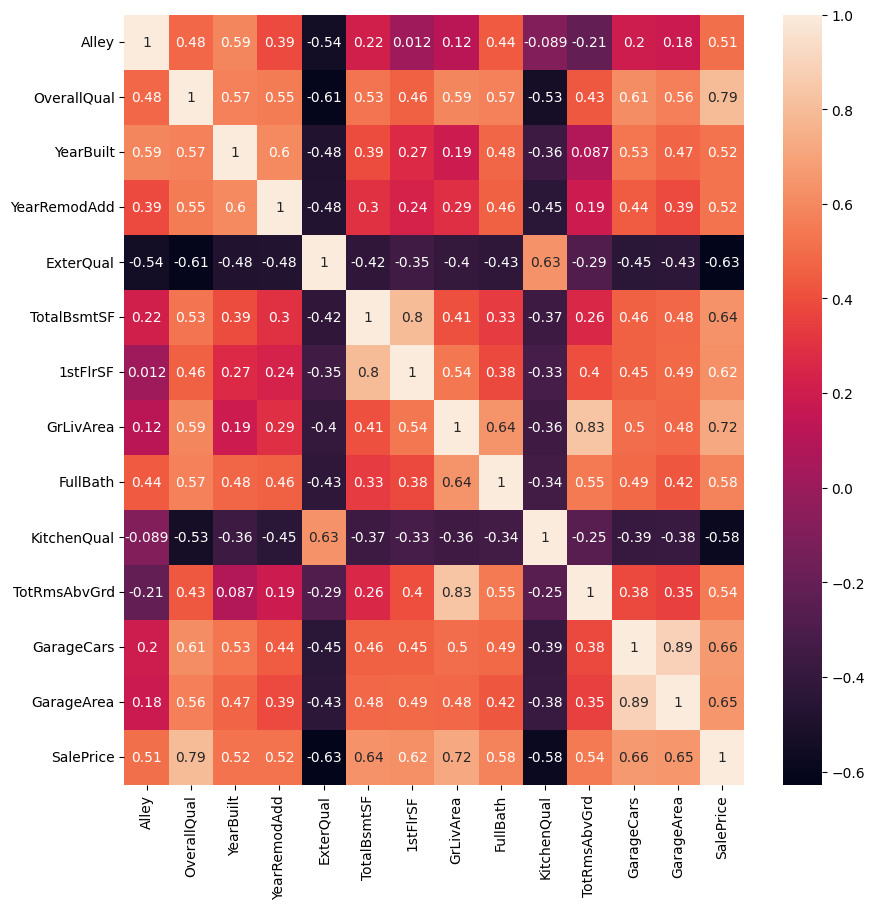

In [33]:
corr = label_X_train.corr()
# Filter the features whose correlation with "SalePrice" is higher than 0.5
highest_corr_features = corr.index[abs(corr['SalePrice']) > 0.5]
fig = plt.figure(figsize = (10,10))
g = sns.heatmap(label_X_train[highest_corr_features].corr(), annot = True)

In [34]:
mlflow.log_figure(fig, "Abs_correlation_matrix.jpg")

Sort the correlation matrix to see the features that are most related to 'SalePrice'

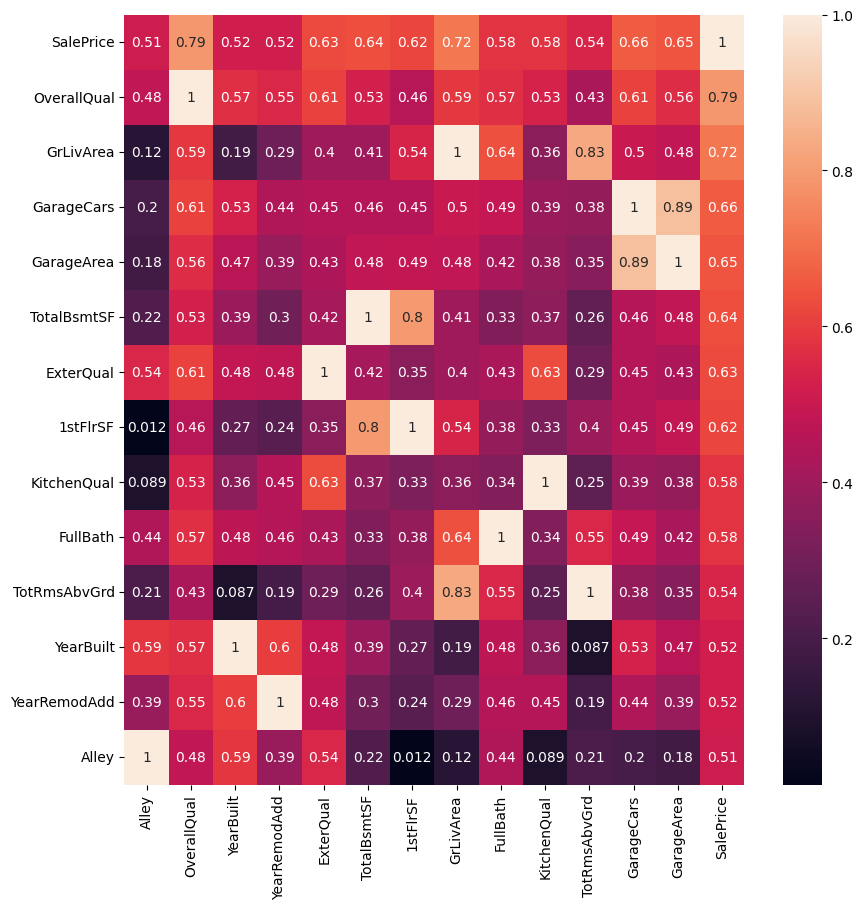

In [35]:
highest_corr = label_X_train[highest_corr_features].corr()
sorted_corr = highest_corr.abs().sort_values('SalePrice', ascending = False)
fig = plt.figure(figsize = (10,10))
g = sns.heatmap(sorted_corr, annot = True)

In [38]:
features_sorted = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                 'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'KitchenQual',
                 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Alley']

In [41]:
clean_features_sorted = features_sorted.copy()
for col in features_sorted:
    for index in features_sorted:
        if col != index and highest_corr[col][index] > 0.8:
            if col in clean_features_sorted:
                clean_features_sorted.remove(col)

print(clean_features_sorted)

In [42]:
reduced_label_X_train = label_X_train[clean_features_sorted];
reduced_label_X_test = label_X_test[clean_features_sorted];
reduced_label_X_valid = label_X_valid[clean_features_sorted];


Apply ML Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

mlflow.sklearn.autolog()

RF = RandomForestRegressor(bootstrap = True, random_state = 12345)

RF.fit(label_X_train, y_train)
y_predict = RF.predict(X_valid)

2022/11/17 19:44:23 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
mlflow.end_run()